In [4]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [34]:
library(dplyr)
library(stringr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [6]:
head(food)

ERROR: Error in eval(expr, envir, enclos): 객체 'food'를 찾을 수 없습니다


In [ ]:
table(food$`식품대분류명`)


     곡류, 서류 제품               과일류               구이류 
                   3                    1                  128 
          국 및 탕류               김치류         나물·숙채류 
                 177                   32                   73 
두류, 견과 및 종실류         면 및 만두류                 밥류 
                   1                  165                  177 
              볶음류         빵 및 과자류         생채·무침류 
                 211                 6093                  175 
    수·조·어·육류   유제품류 및 빙과류         음료 및 차류 
                   5                  425                 3788 
        장류, 양념류       장아찌·절임류     전·적 및 부침류 
                   6                   18                   77 
              젓갈류               조림류         죽 및 스프류 
                   9                   76                   44 
      찌개 및 전골류                 찜류               튀김류 
                 150                   90                  229 

In [ ]:
food <- read.csv("./Data/food.csv")

In [ ]:
summary(food)

   식품코드            식품명          데이터구분코드     데이터구분명      
 Length:12153       Length:12153       Length:12153       Length:12153      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  식품기원코드    식품기원명        식품대분류코드   식품대분류명      
 Min.   :1.000   Length:12153       Min.   : 1.000   Length:12153      
 1st Qu.:2.000   Class :character   1st Qu.: 2.000   Class :character  
 Median :2.000   Mode  :character   Median : 2.000   Mode  :character  
 Mean   :2.183                      Mean   : 9.165                     
 3rd Qu.:2.000                      3rd Qu.:20.000                  

In [ ]:
str(food)

'data.frame':	12153 obs. of  51 variables:
 $ 식품코드          : chr  "D105-253000000-0001" "D202-120000000-0921" "D202-120000000-0922" "D202-120000000-0923" ...
 $ 식품명            : chr  "콩나물국" "피자_슈퍼디럭스 피자 나폴리 (L)" "피자_슈퍼디럭스 피자 슈퍼시드함유도우 (M)" "피자_슈퍼디럭스 피자 씬 (L)" ...
 $ 데이터구분코드    : chr  "D" "D" "D" "D" ...
 $ 데이터구분명      : chr  "음식" "음식" "음식" "음식" ...
 $ 식품기원코드      : int  1 2 2 2 2 2 2 2 2 2 ...
 $ 식품기원명        : chr  "가정식(분석 함량)" "외식(프랜차이즈 등 업체 제공 영양정" "외식(프랜차이즈 등 업체 제공 영양정" "외식(프랜차이즈 등 업체 제공 영양정" ...
 $ 식품대분류코드    : int  5 2 2 2 2 2 2 2 2 2 ...
 $ 식품대분류명      : chr  "국 및 탕류" "빵 및 과자류" "빵 및 과자류" "빵 및 과자류" ...
 $ 대표식품코드      : int  5253 2120 2120 2120 2120 2120 2120 2120 2120 2120 ...
 $ 대표식품명        : chr  "콩나물국" "피자" "피자" "피자" ...
 $ 식품중분류코드    : int  525300 212000 212000 212000 212000 212000 212000 212000 212000 212000 ...
 $ 식품중분류명      : chr  "해당없음" "해당없음" "해당없음" "해당없음" ...
 $ 식품소분류코드    : int  52530000 21200000 21200000 21200000 21200000 21200000 21200000 21200000 21200000 21200000

In [ ]:
unique(food$`식품명`)

[1] "콩나물국"                                                         
    [2] "피자_슈퍼디럭스 피자 나폴리 (L)"                                  
    [3] "피자_슈퍼디럭스 피자 슈퍼시드함유도우 (M)"                        
    [4] "피자_슈퍼디럭스 피자 씬 (L)"                                      
    [5] "피자_슈퍼슈프림 피자 나폴리 (L)"                                  
    [6] "피자_슈퍼슈프림 피자 슈퍼시드함유도우 (M)"                        
    [7] "피자_슈퍼슈프림 피자 더블치즈 엣지 오리지널 (M)"                  
    [8] "피자_슈퍼슈프림 피자 치즈크러스트 (R)"                            
    [9] "피자_슈퍼슈프림 피자 (L)"                                         
   [10] "피자_슈퍼슈프림 피자 고구마크러스트 (L)"                          
   [11] "피자_슈퍼슈프림 피자 고구마크러스트 (R)"                          
   [12] "피자_슈퍼슈프림 피자 라이스골드 (F)"                              
   [13] "피자_슈퍼슈프림 피자 라이스골드 (L)"                              
   [14] "피자_슈퍼슈프림 피자 라이스골드 (R)"                              
   [15] "피자_슈퍼슈프림 피자 라이스바이트 (F)"                            
   [16] "피자_슈퍼슈프림 피자 라이스바이트 (L)"                            
   [17] "피자_쉬림프골드 피자 씬 (L)"                                      
   [18] "피자_쉬림프골드 피자 씬 (R)"                                      
   [19] "피자_쉬림프골드 피자 흑미스크린 (L)"                              
   [20] "피자_쉬림프골드 피자 흑미스크린 (R)"                              
   [21] "피자_쉬림프골드 피자"                                             
   [22] "피자_쉬림프디럭스 피자 (L)"                                       
   [23] "피자_쉬림프콤비 피자 (L)"                                         
   [24] "피자_쉬림프콤비 피자 (M)"                                         
   [25] "피자_쉬림프 피자 (L)"                                             
   [26] "피자_쉬림프 피자 (XL)"                                            
   [27] "피자_쉬림프 피자 골드 (R)"                                        
   [28] "피자_쉬림프 피자 에그타르트 (L)"                                  
   [29] "피자_쉬림프 피자 에그타르트 (R)"                                  
   [30] "피자_쉬림프 피자 오리진 (L)"                                      
   [31] "피자_쉬림프 피자 오리진 (R)"                                      
   [32] "피자_쉬림프 피자 치즈캡 (L)"                                      
   [33] "피자_쉬림프 피자 치즈캡 (R)"                                      
   [34] "피자_쉬림프 피자 크림치즈 (L)"                                    
   [35] "피자_쉬림프 피자 크림치즈 (R)"                                    
   [36] "피자_수퍼수프림 피자 (L)"                                         
   [37] "피자_수퍼슈프림 피자 (L)"                                         
   [38] "피자_수퍼슈프림 피자 (M)"                                         
   [39] "피자_수퍼파파스 피자 (F)"                                         
   [40] "피자_수퍼파파스 피자 (L)"                                         
   [41] "피자_수퍼파파스 피자 (P)"                                         
   [42] "피자_수퍼파파스 피자 (R)"                                         
   [43] "피자_순삭포테이토 피자"                                           
   [44] "피자_쉬림드보니토 피자 (L)"                                       
   [45] "피자_쉬림드보니토 피자 (R)"                                       
   [46] "피자_쉬림프&핫치킨골드 피자 (L)"                                  
   [47] "피자_쉬림프갈릭스노윙 피자"                                       
   [48] "피자_쉬림프골드 피자 (L)"                                         
   [49] "피자_쉬림프 피자 골드 (L)"                                        
   [50] "피자_쉬림프골드 피자 밀스크린 (L)"                                
   [51] "피자_쉬림프골드 피자 밀스크린 (R)"                                
   [52] "피자_쉬림프골드 피자 백미스크린 (L)"                              
   [53] "피자_쉬림프골드 피자 백미스크린 (R)"                              
   [54] "피자_세뇨리따 피자 (L)"                                           
   [55] "피자_세뇨리따 피자 (M)"                                           
   [56] "피자_소고기로제스테이크커리 피자 (L)"                             
   [57] "피자_소베페 피자 (L)"                                             
   [58] "피자_소세지 피자 (L)"                                             
   [59] "피자_소시지 피자 (XL)"                                            
   [60] "피자_소프트포테이토무스 피자 밀도우 (L)"                          
   [61] "피자_소프트포테이토무스 피자 밀도우 (R)"                          
   [62] "피자_소프트포테이토무스 피자 씬도우 (L)"                     

In [ ]:
#unique(food$`대표식품명`)
unique(food$`식품기원명`)

[1] "가정식(분석 함량)"                   
[2] "외식(프랜차이즈 등 업체 제공 영양정" 
[3] "외식(분석함량)"                      
[4] "외식(재료량 기반 산출함량)"          
[5] "초등학교급식(재료량 기반 산출 함량)" 
[6] "중고등학교급식(재료량 기반 산출함량)"
[7] "산업체급식(재료량 기반 산출 함량)"

In [ ]:
nrow(food)

[1] 12153

In [ ]:
colnames(food)

[1] "식품코드"           "식품명"             "데이터구분코드"    
 [4] "데이터구분명"       "식품기원코드"       "식품기원명"        
 [7] "식품대분류코드"     "식품대분류명"       "대표식품코드"      
[10] "대표식품명"         "식품중분류코드"     "식품중분류명"      
[13] "식품소분류코드"     "식품소분류명"       "식품세분류코드"    
[16] "식품세분류명"       "영양성분함량기준량" "에너지.kcal."      
[19] "수분.g."            "단백질.g."          "지방.g."           
[22] "회분.g."            "탄수화물.g."        "당류.g."           
[25] "식이섬유.g."        "칼슘.mg."           "철.mg."            
[28] "인.mg."             "칼륨.mg."           "나트륨.mg."        
[31] "비타민.A.μg.RAE."  "레티놀.μg."        "베타카로틴.μg."   
[34] "티아민.mg."         "리보플라빈.mg."     "니아신.mg."        
[37] "비타민.C.mg."       "비타민.D.μg."      "콜레스테롤.mg."    
[40] "포화지방산.g."      "트랜스지방산.g."    "출처코드"          
[43] "출처명"             "식품중량"           "업체명"            
[46] "데이터생성방법코드" "데이터생성방법명"   "데이터생성일자"    
[49] "데이터기준일자"     "제공기관코드"       "제공기관명"

In [ ]:
food$`식품대분류명`

[1] "국 및 탕류"           "빵 및 과자류"         "빵 및 과자류"        
    [4] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
    [7] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [10] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [13] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [16] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [19] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [22] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [25] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [28] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [31] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [34] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [37] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [40] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [43] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [46] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [49] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [52] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [55] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [58] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [61] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [64] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [67] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [70] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [73] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [76] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [79] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [82] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [85] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [88] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [91] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [94] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
   [97] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [100] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [103] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [106] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [109] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [112] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [115] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [118] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [121] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [124] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [127] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [130] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [133] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [136] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [139] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [142] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [145] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [148] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [151] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [154] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [157] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [160] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [163] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [166] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [169] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [172] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [175] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [178] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [181] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [184] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [187] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [190] "빵 및 과자류"         "빵 및 과자류"         "빵 및 과자류"        
  [193] "빵 및 과자류"         "빵 및 과자류"

In [ ]:
subset(food, food$`식품대분류명`  == '밥류' & food$`업체명` != '해당없음' )

,식품코드,식품명,데이터구분코드,데이터구분명,식품기원코드,식품기원명,식품대분류코드,식품대분류명,대표식품코드,대표식품명,...,출처코드,출처명,식품중량,업체명,데이터생성방법코드,데이터생성방법명,데이터생성일자,데이터기준일자,제공기관코드,제공기관명
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,...,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
6207,D201-013000000-0001,리소토/리조또_스파이시 씨푸드 리조또,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1013,리소토/리조또,...,3,식품의약품안전처,241g,할리스,2,수집,2022-07-11,2024-02-22,1471000,식품의약품안전처
6208,D201-013000000-0002,리소토/리조또_치킨 크림 리조또,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1013,리소토/리조또,...,3,식품의약품안전처,241g,할리스,2,수집,2022-07-11,2024-02-22,1471000,식품의약품안전처
6209,D201-017000000-0001,볶음밥_갈비천왕 치즈 치밥,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1017,볶음밥,...,3,식품의약품안전처,100g,굽네치킨,2,수집,2023-10-11,2024-02-22,1471000,식품의약품안전처
6210,D201-017000000-0002,볶음밥_달걀듬뿍 볶음밥,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1017,볶음밥,...,3,식품의약품안전처,100g,교촌치킨,2,수집,2023-10-11,2024-02-22,1471000,식품의약품안전처
6211,D201-017000000-0003,볶음밥_닭갈비 볶음밥,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1017,볶음밥,...,3,식품의약품안전처,100g,교촌치킨,2,수집,2023-10-11,2024-02-22,1471000,식품의약품안전처
6212,D201-017000000-0004,볶음밥_볼케이노 치즈 치밥,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1017,볶음밥,...,3,식품의약품안전처,100g,굽네치킨,2,수집,2023-10-11,2024-02-22,1471000,식품의약품안전처
6213,D201-017000000-0005,볶음밥_의성마늘 볶음밥,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1017,볶음밥,...,3,식품의약품안전처,100g,교촌치킨,2,수집,2023-10-11,2024-02-22,1471000,식품의약품안전처
6214,D201-028000000-0001,오므라이스_수플레 오믈렛 라이스,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1028,오므라이스,...,3,식품의약품안전처,243g,할리스,2,수집,2022-07-11,2024-02-22,1471000,식품의약품안전처
6215,D201-035000000-0001,주먹밥_까르보나라 구운주먹밥,D,음식,2,외식(프랜차이즈 등 업체 제공 영양정,1,밥류,1035,주먹밥,...,3,식품의약품안전처,100g,이디야,2,수집,2022-07-08,2024-02-22,1471000,식품의약품안전처


# 한 중 일 식 
# 매운가 안매운가 
# 

In [ ]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [9]:
car <- read.csv("./Data/car_data.csv")
head(car)

,X,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>
1,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
2,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
3,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
4,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
5,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
6,5,Mercedes-Benz,E-Class,3779999,Astrakhan,gasoline,automatic,4WD,125000,DE,2.0,184,6


In [10]:
car2 <- read.csv("./Data/train.csv")
head(car2)

,X,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,,17.74
5,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,,3.50
6,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,21 Lakh,17.50


In [11]:
summary(car2)

       X            Name             Location              Year     
 Min.   :   1   Length:5847        Length:5847        Min.   :1998  
 1st Qu.:1510   Class :character   Class :character   1st Qu.:2012  
 Median :3015   Mode  :character   Mode  :character   Median :2014  
 Mean   :3013                                         Mean   :2013  
 3rd Qu.:4518                                         3rd Qu.:2016  
 Max.   :6018                                         Max.   :2019  
                                                                    
 Kilometers_Driven  Fuel_Type         Transmission        Owner_Type       
 Min.   :    171   Length:5847        Length:5847        Length:5847       
 1st Qu.:  33468   Class :character   Class :character   Class :character  
 Median :  52576   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  58410                                                           
 3rd Qu.:  72490                                                    

In [12]:
str(car2)

'data.frame':	5847 obs. of  14 variables:
 $ X                : int  1 2 3 4 6 7 8 9 10 11 ...
 $ Name             : chr  "Hyundai Creta 1.6 CRDi SX Option" "Honda Jazz V" "Maruti Ertiga VDI" "Audi A4 New 2.0 TDI Multitronic" ...
 $ Location         : chr  "Pune" "Chennai" "Chennai" "Coimbatore" ...
 $ Year             : int  2015 2011 2012 2013 2013 2016 2013 2012 2018 2012 ...
 $ Kilometers_Driven: int  41000 46000 87000 40670 86999 36000 64430 65932 25692 60000 ...
 $ Fuel_Type        : chr  "Diesel" "Petrol" "Diesel" "Diesel" ...
 $ Transmission     : chr  "Manual" "Manual" "Manual" "Automatic" ...
 $ Owner_Type       : chr  "First" "First" "First" "Second" ...
 $ Mileage          : chr  "19.67 kmpl" "13 km/kg" "20.77 kmpl" "15.2 kmpl" ...
 $ Engine           : chr  "1582 CC" "1199 CC" "1248 CC" "1968 CC" ...
 $ Power            : chr  "126.2 bhp" "88.7 bhp" "88.76 bhp" "140.8 bhp" ...
 $ Seats            : num  5 5 7 5 5 8 5 5 5 5 ...
 $ New_Price        : chr  "" "8.61 Lakh" "" "

In [13]:
head(car)

,X,car_brand,car_model,car_price,car_city,car_fuel,car_transmission,car_drive,car_mileage,car_country,car_engine_capacity,car_engine_hp,car_age
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>
1,0,Ford,Focus,550000,Astrakhan,gasoline,manual,FWD,300000,USA,1.8,125,14
2,1,Mercedes-Benz,GLA-Class,1820000,Astrakhan,gasoline,robot,FWD,88000,DE,1.6,156,10
3,2,Haval,F7,2600000,Astrakhan,gasoline,robot,4WD,19000,CN,1.5,150,2
4,3,Toyota,Camry,4200000,Astrakhan,gasoline,automatic,FWD,30000,JP,3.5,249,2
5,4,OMODA,C5,2125000,Astrakhan,gasoline,CVT,FWD,18824,CN,1.5,147,2
6,5,Mercedes-Benz,E-Class,3779999,Astrakhan,gasoline,automatic,4WD,125000,DE,2.0,184,6


In [14]:
subset(car2 , car2$Name == 'Hyundai Creta 1.6 CRDi SX Option')

,X,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.50
2005,2064,Hyundai Creta 1.6 CRDi SX Option,Chennai,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,11.90
2547,2631,Hyundai Creta 1.6 CRDi SX Option,Coimbatore,2016,11554,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,14.25
3206,3309,Hyundai Creta 1.6 CRDi SX Option,Pune,2017,40158,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,13.75
3931,4056,Hyundai Creta 1.6 CRDi SX Option,Ahmedabad,2015,61786,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,10.50
3994,4122,Hyundai Creta 1.6 CRDi SX Option,Kochi,2017,44887,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.13
4442,4574,Hyundai Creta 1.6 CRDi SX Option,Bangalore,2016,51000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,13.25
4476,4609,Hyundai Creta 1.6 CRDi SX Option,Coimbatore,2017,60083,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,13.78
4625,4762,Hyundai Creta 1.6 CRDi SX Option,Jaipur,2015,78046,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,10.90


In [15]:
nrow(car2)

[1] 5847

In [16]:
# 연료타입 빈도 확인
table(car2$Fuel_Type)


  Diesel Electric   Petrol 
    3161        2     2684 

In [17]:
# 연료타입 전기 확인
 subset(car2 , car2$Fuel_Type== 'Electric')

,X,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
4314,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,,72 CC,41 bhp,5,13.58 Lakh,13.00
4763,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,,1798 CC,73 bhp,5,,12.75


In [18]:
# 전기차 제외시키기
car2 <- car2[car2$Fuel_Type != 'Electric', ]
table(car2$Fuel_Type)


Diesel Petrol 
  3161   2684 

In [19]:
# 연료타입 확인
table(car2$Fuel_Type)


Diesel Petrol 
  3161   2684 

In [20]:
# Petrol 이름 바꾸기
car2$Fuel_Type <- ifelse(car2$Fuel_Type == "Petrol", "Gasoline", car2$Fuel_Type)
table(car2$Fuel_Type)


  Diesel Gasoline 
    3161     2684 

In [21]:
head(car2)

,X,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Gasoline,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,,17.74
5,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,,3.50
6,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,21 Lakh,17.50


In [22]:
# X 컬럼 제외 
car2 <- car2[,c(-1)]
head(car2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.50
2,Honda Jazz V,Chennai,2011,46000,Gasoline,Manual,First,13 km/kg,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,,17.74
5,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8,21 Lakh,17.50


In [23]:
car2 <- car2[,-c(2,8,9,10,11,12)]


In [24]:
head(car2)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,12.50
2,Honda Jazz V,2011,46000,Gasoline,Manual,First,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,17.74
5,Nissan Micra Diesel XV,2013,86999,Diesel,Manual,First,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,Diesel,Automatic,First,17.50


In [25]:
car2$Fuel_Type <- ifelse(car2$Fuel_Type == "Gasoline", "gasoline", car2$Fuel_Type)

In [26]:
head(car2)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,12.50
2,Honda Jazz V,2011,46000,gasoline,Manual,First,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,17.74
5,Nissan Micra Diesel XV,2013,86999,Diesel,Manual,First,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,Diesel,Automatic,First,17.50


In [29]:
car2[,-c(6)]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,12.50
2,Honda Jazz V,2011,46000,gasoline,Manual,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,17.74
5,Nissan Micra Diesel XV,2013,86999,Diesel,Manual,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,Diesel,Automatic,17.50
7,Volkswagen Vento Diesel Comfortline,2013,64430,Diesel,Manual,5.20
8,Tata Indica Vista Quadrajet LS,2012,65932,Diesel,Manual,1.95
9,Maruti Ciaz Zeta,2018,25692,gasoline,Manual,9.95


In [30]:
head(car2)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,12.50
2,Honda Jazz V,2011,46000,gasoline,Manual,First,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,17.74
5,Nissan Micra Diesel XV,2013,86999,Diesel,Manual,First,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,Diesel,Automatic,First,17.50


In [31]:
# 대소문자 변경
car2$Transmission <- ifelse(car2$Transmission == "Manual", "manual", car2$Transmission)
car2$Transmission <- ifelse(car2$Transmission == "Automatic", "automatic", car2$Transmission)
head(car2)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,manual,First,12.50
2,Honda Jazz V,2011,46000,gasoline,manual,First,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,manual,First,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,automatic,Second,17.74
5,Nissan Micra Diesel XV,2013,86999,Diesel,manual,First,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,Diesel,automatic,First,17.50


In [32]:
# 연식을 년도에서 경과년으로 변경   
car2$Year <- c( 2024 - car2$Year) 
head(car2)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,9,41000,Diesel,manual,First,12.50
2,Honda Jazz V,13,46000,gasoline,manual,First,4.50
3,Maruti Ertiga VDI,12,87000,Diesel,manual,First,6.00
4,Audi A4 New 2.0 TDI Multitronic,11,40670,Diesel,automatic,Second,17.74
5,Nissan Micra Diesel XV,11,86999,Diesel,manual,First,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,8,36000,Diesel,automatic,First,17.50


In [33]:
car2 <- car2[,-c(6)]

In [34]:
head(car2)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,9,41000,Diesel,manual,12.50
2,Honda Jazz V,13,46000,gasoline,manual,4.50
3,Maruti Ertiga VDI,12,87000,Diesel,manual,6.00
4,Audi A4 New 2.0 TDI Multitronic,11,40670,Diesel,automatic,17.74
5,Nissan Micra Diesel XV,11,86999,Diesel,manual,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,8,36000,Diesel,automatic,17.50


In [35]:
help(colnames)

row+colnames               package:base                R Documentation

_R_o_w _a_n_d _C_o_l_u_m_n _N_a_m_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Retrieve or set the row or column names of a matrix-like object.

_U_s_a_g_e:

     rownames(x, do.NULL = TRUE, prefix = "row")
     rownames(x) <- value
     
     colnames(x, do.NULL = TRUE, prefix = "col")
     colnames(x) <- value
     
_A_r_g_u_m_e_n_t_s:

       x: a matrix-like R object, with at least two dimensions for
          ‘colnames’.

 do.NULL: logical. If ‘FALSE’ and names are ‘NULL’, names are
          created.

  prefix: for created names.

   value: a valid value for that component of ‘dimnames(x)’.  For a
          matrix or array this is either ‘NULL’ or a character vector
          of non-zero length equal to the appropriate dimension.

_D_e_t_a_i_l_s:

     The extractor functions try to do something sensible for any
     matrix-like object ‘x’.  If the object has ‘dimnames’ 

In [36]:
# 합의된 컬럼네임으로 변경
colnames(car2) <- c('car_brand','car_age','car_mileage','car_fuel','car_transmission','car_mileage')

In [37]:
head(car2)

,car_brand,car_age,car_mileage,car_fuel,car_transmission,car_mileage
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,9,41000,Diesel,manual,12.50
2,Honda Jazz V,13,46000,gasoline,manual,4.50
3,Maruti Ertiga VDI,12,87000,Diesel,manual,6.00
4,Audi A4 New 2.0 TDI Multitronic,11,40670,Diesel,automatic,17.74
5,Nissan Micra Diesel XV,11,86999,Diesel,manual,3.50
6,Toyota Innova Crysta 2.8 GX AT 8S,8,36000,Diesel,automatic,17.50


In [38]:
# 모델과 브랜드명 분리를 위해 먼저 컬럼 추가
car2$car_model <- car2$car_brand

In [39]:
head(car2)

,car_brand,car_age,car_mileage,car_fuel,car_transmission,car_mileage,car_model
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>
1,Hyundai Creta 1.6 CRDi SX Option,9,41000,Diesel,manual,12.50,Hyundai Creta 1.6 CRDi SX Option
2,Honda Jazz V,13,46000,gasoline,manual,4.50,Honda Jazz V
3,Maruti Ertiga VDI,12,87000,Diesel,manual,6.00,Maruti Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,11,40670,Diesel,automatic,17.74,Audi A4 New 2.0 TDI Multitronic
5,Nissan Micra Diesel XV,11,86999,Diesel,manual,3.50,Nissan Micra Diesel XV
6,Toyota Innova Crysta 2.8 GX AT 8S,8,36000,Diesel,automatic,17.50,Toyota Innova Crysta 2.8 GX AT 8S


In [40]:
# 컬럼순서 변경
car2 <- car2[,c(1,7,6,4,5,3,2)]


In [41]:
head(car2)

,car_brand,car_model,car_mileage,car_fuel,car_transmission,car_mileage.1,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,12.50,Diesel,manual,41000,9
2,Honda Jazz V,Honda Jazz V,4.50,gasoline,manual,46000,13
3,Maruti Ertiga VDI,Maruti Ertiga VDI,6.00,Diesel,manual,87000,12
4,Audi A4 New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,17.74,Diesel,automatic,40670,11
5,Nissan Micra Diesel XV,Nissan Micra Diesel XV,3.50,Diesel,manual,86999,11
6,Toyota Innova Crysta 2.8 GX AT 8S,Toyota Innova Crysta 2.8 GX AT 8S,17.50,Diesel,automatic,36000,8


In [42]:
colnames(car2) <- c('car_brand','car_age','car_price','car_fuel','car_transmission','car_mileage')

In [43]:
subset(car2, car2$car_brand == 'Hyundai' & car2$car_brand == 'Kia' & car2$car_brand == 'Chervolet' & car2$car_brand == 'Audi' & car2$car_brand == 'Audi',)

car_brand,car_age,car_price,car_fuel,car_transmission,car_mileage,NA
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>


In [44]:
    # 원하는 차종만으로 데이터 꾸미기
 
 car2final <- rbind(subset(car2, grepl("Hyundai", car_brand)),
subset(car2, grepl("Kia", car_brand)),
subset(car2, grepl("Chervolet", car_brand)),
subset(car2, grepl("Audi", car_brand)),
subset(car2, grepl("Mercedes-Benz", car_brand)),
subset(car2, grepl("BMW", car_brand)))



In [45]:
#subset(car2, grepl("Mercedes-Benz", car_brand))

In [46]:
# 브랜드와 모델명 분리
hyunData <- subset(car2, grepl("Hyundai", car_brand))
hyunData$car_brand <- str_extract(hyunData$car_brand, "Hyundai")

hyunData$car_age <- gsub("Hyundai", "", hyunData$car_age)
head(hyunData)
#

audiDAta <- subset(car2, grepl("Audi", car_brand))
audiDAta$car_brand <- str_extract(audiDAta$car_brand, "Audi")

audiDAta$car_age <- gsub("Audi", "", audiDAta$car_age)
head(audiDAta)
#
benzData <- subset(car2, grepl("Mercedes-Benz", car_brand))
benzData$car_brand <- str_extract(benzData$car_brand, "Mercedes-Benz")

benzData$car_age <- gsub("Mercedes-Benz", "", benzData$car_age)
head(benzData)
#
bmwData <- subset(car2, grepl("BMW", car_brand))
bmwData$car_brand <- str_extract(bmwData$car_brand, "BMW")

bmwData$car_age <- gsub("BMW", "", bmwData$car_age)
head(bmwData)


,car_brand,car_age,car_price,car_fuel,car_transmission,car_mileage,NA
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Hyundai,Creta 1.6 CRDi SX Option,12.50,Diesel,manual,41000,9
22,Hyundai,i20 1.2 Magna,1.87,gasoline,manual,45807,14
42,Hyundai,i20 Magna Optional 1.2,4.74,gasoline,manual,35487,10
43,Hyundai,Elantra 2.0 SX Option AT,8.85,gasoline,automatic,46374,10
45,Hyundai,Elantra CRDi,4.25,Diesel,manual,58005,16
47,Hyundai,Xcent 1.1 CRDi S,3.85,Diesel,manual,75000,10


,car_brand,car_age,car_price,car_fuel,car_transmission,car_mileage,NA
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
4,Audi,A4 New 2.0 TDI Multitronic,17.74,Diesel,automatic,40670,11
21,Audi,A6 2011-2015 35 TFSI Technology,23.50,gasoline,automatic,55985,9
32,Audi,A6 2.7 TDI,11.50,Diesel,automatic,35000,14
49,Audi,A4 2.0 TDI 177 Bhp Premium Plus,21.43,Diesel,automatic,13648,9
64,Audi,A4 2.0 TDI Multitronic,13.50,Diesel,automatic,65664,12
74,Audi,A6 2.0 TDI Design Edition,29.50,Diesel,automatic,56000,10


,car_brand,car_age,car_price,car_fuel,car_transmission,car_mileage,NA
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
18,Mercedes-Benz,New C-Class C 220 CDI BE Avantgare,28.00,Diesel,automatic,78500,10
37,Mercedes-Benz,M-Class ML 350 CDI,28.00,Diesel,automatic,85000,11
61,Mercedes-Benz,New C-Class C 200 CGI Avantgarde,26.70,gasoline,automatic,58000,9
62,Mercedes-Benz,New C-Class 200 CDI Classic,10.00,Diesel,manual,65000,13
66,Mercedes-Benz,C-Class Progressive C 220d,35.67,Diesel,automatic,15369,5
116,Mercedes-Benz,B Class B200 CDI,16.75,Diesel,automatic,53753,10


,car_brand,car_age,car_price,car_fuel,car_transmission,car_mileage,NA
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
19,BMW,3 Series 320d,18.55,Diesel,automatic,32982,10
83,BMW,5 Series 2003-2012 525d,13.90,Diesel,automatic,75000,13
109,BMW,3 Series 320d Luxury Line,20.75,Diesel,automatic,56087,9
114,BMW,5 Series 2010-2013 525i,7.00,gasoline,automatic,128000,15
131,BMW,1 Series 118d Base,17.22,Diesel,automatic,31821,9
142,BMW,3 Series Luxury Line,26.50,Diesel,automatic,48000,10


In [47]:
colnames(car2final) <- c('car_brand','car_age','car_price','car_fuel','car_transmission','car_mileage','car_age')

In [48]:
car2final <- rbind(hyunData,audiDAta,benzData,bmwData)

colnames(car2final) <- c('car_brand','car_model','car_price','car_fuel','car_transmission','car_mileage','car_age')
head(car2final)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Hyundai,Creta 1.6 CRDi SX Option,12.50,Diesel,manual,41000,9
22,Hyundai,i20 1.2 Magna,1.87,gasoline,manual,45807,14
42,Hyundai,i20 Magna Optional 1.2,4.74,gasoline,manual,35487,10
43,Hyundai,Elantra 2.0 SX Option AT,8.85,gasoline,automatic,46374,10
45,Hyundai,Elantra CRDi,4.25,Diesel,manual,58005,16
47,Hyundai,Xcent 1.1 CRDi S,3.85,Diesel,manual,75000,10


In [49]:
#car2final$car_price <- as.character(car2final$car_price)
car2final$car_price <- as.double(car2final$car_price)
car2final$car_price <- car2final$car_price * 100000 * 0.012
car2final

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Hyundai,Creta 1.6 CRDi SX Option,15000,Diesel,manual,41000,9
22,Hyundai,i20 1.2 Magna,2244,gasoline,manual,45807,14
42,Hyundai,i20 Magna Optional 1.2,5688,gasoline,manual,35487,10
43,Hyundai,Elantra 2.0 SX Option AT,10620,gasoline,automatic,46374,10
45,Hyundai,Elantra CRDi,5100,Diesel,manual,58005,16
47,Hyundai,Xcent 1.1 CRDi S,4620,Diesel,manual,75000,10
53,Hyundai,Grand i10 Sportz,4320,gasoline,manual,54000,9
56,Hyundai,i10 Asta,2484,gasoline,manual,32000,14
68,Hyundai,Creta 1.4 E Plus Diesel,12600,Diesel,manual,13000,6


In [50]:
table(car2final$car_model)


                                      1 Series 118d Base 
                                                       2 
                                1 Series 118d Sport Line 
                                                       1 
                           3 Series 2005-2011 325i Sedan 
                                                       3 
                                     3 Series 318i Sedan 
                                                       1 
                                           3 Series 320d 
                                                      20 
                         3 Series 320d Corporate Edition 
                                                       3 
                                   3 Series 320d Dynamic 
                                                       1 
                            3 Series 320d GT Luxury Line 
                                                       2 
                                  3 Series 320d Highline 
             

In [61]:
write.csv(car2final, file = "car2final.csv", row.names = FALSE)

In [60]:
write.csv(bmw_selected, file = "bmw_selected.csv", row.names = FALSE)

In [65]:
audi_data <- subset(car2final, grepl('Audi', car_brand)) 
#audi_data
table(audi_data$car_model)

In [59]:
bmw_selected  <- subset(car2final, grepl('BMW', car_brand)) 
bmw_selected$car_model <- gsub("^[^1-7]*([1-7] Series).*", "\\1", bmw_selected$car_model)
bmw_selected$car_model <- gsub("X([1-6]).*", "X\\1", bmw_selected$car_model)
bmw_selected$car_model <- gsub("Z([4]).*", "Z\\1", bmw_selected$car_model)
#bmw_selected  <- subset(bmw_selected, grepl('Z', car_brand)) 
bmw_selected
table(bmw_selected$car_model)
#bmw_selected



,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
19,BMW,3 Series,22260,Diesel,automatic,32982,10
83,BMW,5 Series,16680,Diesel,automatic,75000,13
109,BMW,3 Series,24900,Diesel,automatic,56087,9
114,BMW,5 Series,8400,gasoline,automatic,128000,15
131,BMW,1 Series,20664,Diesel,automatic,31821,9
142,BMW,3 Series,31800,Diesel,automatic,48000,10
161,BMW,X5,54000,Diesel,automatic,41000,9
175,BMW,5 Series,40200,Diesel,automatic,51000,10
238,BMW,X1,22200,Diesel,automatic,82002,10



      X1       X3       X5       X6       Z4 1 Series 3 Series 5 Series 
      32       14       24        6        2        3       98       68 
6 Series 7 Series 
       7       13 

In [52]:
bmw_selected <- subset(car2final, grepl("Series|X[1-6]|Z4", car_model))
table(bmw_selected$car_model)


                                      1 Series 118d Base 
                                                       2 
                                1 Series 118d Sport Line 
                                                       1 
                           3 Series 2005-2011 325i Sedan 
                                                       3 
                                     3 Series 318i Sedan 
                                                       1 
                                           3 Series 320d 
                                                      20 
                         3 Series 320d Corporate Edition 
                                                       3 
                                   3 Series 320d Dynamic 
                                                       1 
                            3 Series 320d GT Luxury Line 
                                                       2 
                                  3 Series 320d Highline 
             

In [53]:

bmw_data <- subset(car2final, grepl("BMW", car_brand))
table(bmw_data$car_model)


                                      1 Series 118d Base 
                                                       2 
                                1 Series 118d Sport Line 
                                                       1 
                           3 Series 2005-2011 325i Sedan 
                                                       3 
                                     3 Series 318i Sedan 
                                                       1 
                                           3 Series 320d 
                                                      20 
                         3 Series 320d Corporate Edition 
                                                       3 
                                   3 Series 320d Dynamic 
                                                       1 
                            3 Series 320d GT Luxury Line 
                                                       2 
                                  3 Series 320d Highline 
             

In [54]:
#subset(car2final, grepl("BMW", car_brand))

#table(car2final$car_model)
bmw_data <- subset(car2, grepl("BMW", car_brand))
table(bmw_data$car_brand)
#bmw_data


                                     BMW 1 Series 118d Base 
                                                          2 
                               BMW 1 Series 118d Sport Line 
                                                          1 
                          BMW 3 Series 2005-2011 325i Sedan 
                                                          3 
                                    BMW 3 Series 318i Sedan 
                                                          1 
                                          BMW 3 Series 320d 
                                                         20 
                        BMW 3 Series 320d Corporate Edition 
                                                          3 
                                  BMW 3 Series 320d Dynamic 
                                                          1 
                           BMW 3 Series 320d GT Luxury Line 
                                                          2 
                       

In [55]:

bmdata <- subset(car2final, grepl("Series", car_model))

###############

head(bmdata)

bmdata$car_model <- gsub("^[^0-9]*([0-9]+).*", "\\1 Series", bmdata$car_model)

table(bmdata$car_model)


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
19,BMW,3 Series 320d,22260,Diesel,automatic,32982,10
83,BMW,5 Series 2003-2012 525d,16680,Diesel,automatic,75000,13
109,BMW,3 Series 320d Luxury Line,24900,Diesel,automatic,56087,9
114,BMW,5 Series 2010-2013 525i,8400,gasoline,automatic,128000,15
131,BMW,1 Series 118d Base,20664,Diesel,automatic,31821,9
142,BMW,3 Series Luxury Line,31800,Diesel,automatic,48000,10



1 Series 3 Series 5 Series 6 Series 7 Series 
       3       98       68        7       13 

In [56]:
#bmdata2 <- subset(bmw_data, grepl("X", car_model))
#bmdata2
bmw_data$car_brand

[1] "BMW 3 Series 320d"                                          
  [2] "BMW 5 Series 2003-2012 525d"                                
  [3] "BMW 3 Series 320d Luxury Line"                              
  [4] "BMW 5 Series 2010-2013 525i"                                
  [5] "BMW 1 Series 118d Base"                                     
  [6] "BMW 3 Series Luxury Line"                                   
  [7] "BMW X5 xDrive 30d"                                          
  [8] "BMW 5 Series 520d Luxury Line"                              
  [9] "BMW X1 sDrive20d"                                           
 [10] "BMW X3 xDrive30d M Sport"                                   
 [11] "BMW 5 Series 2003-2012 520d"                                
 [12] "BMW 6 Series 640d Gran Coupe"                               
 [13] "BMW 3 Series Luxury Line"                                   
 [14] "BMW X5 3.0d"                                                
 [15] "BMW 3 Series 320d Sedan"                                    
 [16] "BMW 5 Series 525d Sedan"                                    
 [17] "BMW 3 Series Luxury Line"                                   
 [18] "BMW 5 Series 2003-2012 GT 530d LE"                          
 [19] "BMW 3 Series Luxury Line"                                   
 [20] "BMW 5 Series 2003-2012 523i"                                
 [21] "BMW X5 xDrive 30d"                                          
 [22] "BMW 3 Series 320i Sedan"                                    
 [23] "BMW 5 Series 2003-2012 520d"                                
 [24] "BMW X1 sDrive 20d xLine"                                    
 [25] "BMW 3 Series 320d Luxury Line"                              
 [26] "BMW X1 sDrive 20d Sportline"                                
 [27] "BMW X1 sDrive 20d Exclusive"                                
 [28] "BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater"
 [29] "BMW 5 Series 2013-2017 530d M Sport"                        
 [30] "BMW 3 Series 320d Prestige"                                 
 [31] "BMW 3 Series 320d"                                          
 [32] "BMW 5 Series 2013-2017 520d Luxury Line"                    
 [33] "BMW 3 Series 320d Highline"                                 
 [34] "BMW X5 xDrive 30d Design Pure Experience 5 Seater"          
 [35] "BMW 3 Series 320d Corporate Edition"                        
 [36] "BMW 3 Series 320d Luxury Plus"                              
 [37] "BMW 3 Series 320d Luxury Line"                              
 [38] "BMW 3 Series 320d Luxury Line"                              
 [39] "BMW 5 Series 2003-2012 530d Highline"                       
 [40] "BMW 3 Series 320d M Sport"                                  
 [41] "BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater"
 [42] "BMW 3 Series 320d Highline"                                 
 [43] "BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater"
 [44] "BMW 5 Series 520d Luxury Line"                              
 [45] "BMW 3 Series 320d Sport Line"                               
 [46] "BMW 5 Series 2003-2012 520d"                                
 [47] "BMW 5 Series 2003-2012 530d Highline"                       
 [48] "BMW X1 sDrive 18i"                                          
 [49] "BMW 3 Series 320d"                                          
 [50] "BMW 5 Series 2010-2013 525i"                                
 [51] "BMW 5 Series 2013-2017 525d Luxury Line"                    
 [52] "BMW 7 Series 2007-2012 740Li"                               
 [53] "BMW 3 Series 320d Luxury Line"                              
 [54] "BMW 5 Series 2013-2017 530d M Sport"                        
 [55] "BMW 3 Series 320d Luxury Line"                              
 [56] "BMW 5 Series 2013-2017 520d Luxury Line"                    
 [57] "BMW 3 Series 328i Sport Line"                               
 [58] "BMW 5 Series 520d Luxury Line"                              
 [59] "BMW X1 M Sport sDrive 20d"                         

In [57]:
head(car2final)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Hyundai,Creta 1.6 CRDi SX Option,15000,Diesel,manual,41000,9
22,Hyundai,i20 1.2 Magna,2244,gasoline,manual,45807,14
42,Hyundai,i20 Magna Optional 1.2,5688,gasoline,manual,35487,10
43,Hyundai,Elantra 2.0 SX Option AT,10620,gasoline,automatic,46374,10
45,Hyundai,Elantra CRDi,5100,Diesel,manual,58005,16
47,Hyundai,Xcent 1.1 CRDi S,4620,Diesel,manual,75000,10


In [16]:
kangData <- read.csv("./Data//Kang_finaldata.csv")
finaldata <- read.csv("./Data//finaldata.csv") 
hwiData <- read.csv("./Data//user_car_hwi.csv")

In [6]:
table(finaldata$car_brand)

subset(finaldata, )


         Audi           BMW     Chevrolet       Hyundai           KIA 
         7979          7557           984          9633          5355 
Mercedes-Benz 
        10067 

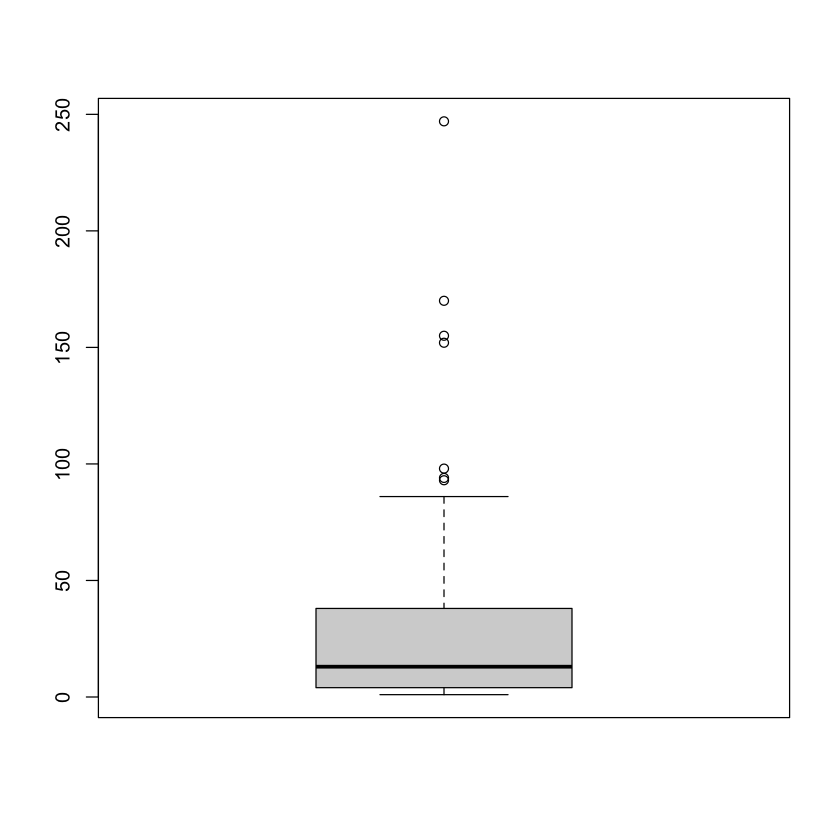

In [13]:
par(bg = 'white')
boxplot(table(kangData$car_model))

In [14]:
table(kangData$car_model)


     A class           A3           A4           A6           A7           A8 
           8            4           77           49            3            2 
      Accent      B class      C-class          CLA    CLS-class        Creta 
          17           12            3           13            1           93 
     E-class          EON      Elantra        Elite     GL-class    GLA class 
          86           60           22           14           11           18 
         GLC          GLE          GLS         Getz        Grand      M-class 
           8           12            2           10          152           23 
 New C-class           Q3           Q5           Q7      R-class      S class 
          94           27           30           38            4           10 
     S-class     SL-class          SLC    SLK-class     Santa Fe       Santro 
           5            1            2            3           17           33 
      Sonata       Tucson        Verna           X1

In [18]:
indiaData <-rbind(kangData,hwiData)

In [54]:
table(indiaData$car_model)
length(table(indiaData$car_model))
length(unique((indiaData$car_model)))
table(indiaData$car_brand)


     A class           A3           A4           A6           A7           A8 
           8            4           77           49            3            2 
      Accent      B class      C-class          CLA    CLS-class        Creta 
          17           12            3           13            1           93 
     E-class          EON      Elantra        Elite     GL-class    GLA class 
          86           60           22           14           11           18 
         GLC          GLE          GLS         Getz        Grand      M-class 
           8           12            2           10          152           23 
 New C-class           Q3           Q5           Q7      R-class      S class 
          94           27           30           38            4           10 
     S-class     SL-class          SLC    SLK-class     Santa Fe       Santro 
           5            1            2            3           17           33 
      Sonata       Tucson        Verna           X1

[1] 117

[1] 117


         Audi           BMW     Chevrolet       Hyundai           Kia 
          559           750           401          4657            33 
Mercedes-Benz 
          817 

In [52]:
kangData$car_model <- kangData$car_model[kangData$car_model == ' S-class'] <- 'S-class'

In [51]:
subset(indiaData, car_model == 'S-Class')
subset(indiaData, car_model == ' S-class')

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
6750,Mercedes-Benz,S-Class,54000,diesel,automatic,56000,9
6779,Mercedes-Benz,S-Class,132000,gasoline,automatic,41000,8
6781,Mercedes-Benz,S-Class,22068,diesel,automatic,90000,13
6785,Mercedes-Benz,S-Class,17460,diesel,automatic,50312,14
6804,Mercedes-Benz,S-Class,22200,gasoline,automatic,57000,13
6817,Mercedes-Benz,S-Class,9600,gasoline,automatic,50000,17
6840,Mercedes-Benz,S-Class,97800,diesel,automatic,6500,7
6850,Mercedes-Benz,S-Class,27300,gasoline,automatic,70000,13
6858,Mercedes-Benz,S-Class,36000,diesel,automatic,50000,12


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1496,Mercedes-Benz,S-class,12900,gasoline,manual,30000,18
1509,Mercedes-Benz,S-class,7800,gasoline,automatic,111000,21
1514,Mercedes-Benz,S-class,20508,gasoline,manual,84143,17
1536,Mercedes-Benz,S-class,8520,gasoline,automatic,119859,20
1543,Mercedes-Benz,S-class,36000,Diesel,automatic,47140,13


In [40]:
subset(kangData, car_model == ' S class')

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1302,Mercedes-Benz,S class,36000,gasoline,automatic,35277,14
1321,Mercedes-Benz,S class,75372,Diesel,automatic,56451,7
1330,Mercedes-Benz,S class,22200,Diesel,automatic,137000,14
1334,Mercedes-Benz,S class,22800,gasoline,automatic,47088,18
1381,Mercedes-Benz,S class,26400,Diesel,automatic,42000,15
1403,Mercedes-Benz,S class,11988,gasoline,automatic,55000,17
1478,Mercedes-Benz,S class,30000,Diesel,automatic,98000,15
1520,Mercedes-Benz,S class,10620,gasoline,automatic,103000,18
1579,Mercedes-Benz,S class,25200,Diesel,automatic,37000,14


In [42]:
kangData$car_model <- kangData$car_model[kangData$car_model == ' S class'] <- 'S-Class'

In [32]:
subset(kangData, car_model == 'Sonata')

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
341,Hyundai,Sonata,5880,Diesel,manual,65000,15
555,Hyundai,Sonata,15300,gasoline,manual,12000,10
600,Hyundai,Sonata,7200,gasoline,automatic,41000,11
615,Hyundai,Sonata,6300,Diesel,automatic,94000,15
675,Hyundai,Sonata,1800,gasoline,manual,44200,21
885,Hyundai,Sonata,9480,gasoline,manual,45000,11


In [43]:
kangData$car_model <- kangData$car_model[kangData$car_model == ' Sonata'] <- 'Sonata'

In [29]:
subset(hwiData, car_model == 'Sonata')

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1493,Hyundai,Sonata,9000,gasoline,automatic,70000,12
1498,Hyundai,Sonata,3300,diesel,manual,110000,17
1944,Hyundai,Sonata,12900,gasoline,manual,12002,10
3677,Hyundai,Sonata,7800,gasoline,manual,44000,12
4054,Hyundai,Sonata,14400,gasoline,manual,17650,11
4419,Hyundai,Sonata,13800,gasoline,manual,7500,12
4475,Hyundai,Sonata,9960,gasoline,automatic,39000,10


In [114]:
indo <- read.csv("./Data//indoCar.csv")
head(indo)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
2,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
3,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
4,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
5,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
6,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [115]:
table(indo$name)


                            Ambassador CLASSIC 1500 DSL AC 
                                                         2 
                               Ambassador Classic 2000 Dsz 
                                                         1 
                      Ambassador Grand 1800 ISZ MPFI PW CL 
                                                         1 
                                          Audi A4 1.8 TFSI 
                                                         1 
                                           Audi A4 2.0 TDI 
                                                         1 
                      Audi A4 2.0 TDI 177 Bhp Premium Plus 
                                                         2 
                                   Audi A4 3.0 TDI Quattro 
                                                        12 
                                Audi A4 30 TFSI Technology 
                                                         2 
                                    Aud

In [94]:
subset(indo, name == 'Mercedes-Benz')

name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>


In [119]:
#indobenz <- subset(indo, grepl("Mercedes-Benz", name))
#head(indobenz)
#indo$car_model <- indo$name
#head(indo)
#indo
#indo[,-c()]
#indo <- indo[,c(1,7,3,5,6,4,2)]
#car2 <- car2[,c(1,7,6,4,5,3,2)]
#head(indo)
#head(indo)
#indo <- indo[,-c(6,8)]

colnames(indo) <- c("car_brand","car_model","car_price","car_fuel","car_transmission","car_mileage","car_age")
head(indo)


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,Maruti 800 AC,Maruti 800 AC,60000,Petrol,Manual,70000,2007
2,Maruti Wagon R LXI Minor,Maruti Wagon R LXI Minor,135000,Petrol,Manual,50000,2007
3,Hyundai Verna 1.6 SX,Hyundai Verna 1.6 SX,600000,Diesel,Manual,100000,2012
4,Datsun RediGO T Option,Datsun RediGO T Option,250000,Petrol,Manual,46000,2017
5,Honda Amaze VX i-DTEC,Honda Amaze VX i-DTEC,450000,Diesel,Manual,141000,2014
6,Maruti Alto LX BSIII,Maruti Alto LX BSIII,140000,Petrol,Manual,125000,2007


In [120]:
table(indo$car_fuel)


     CNG   Diesel Electric      LPG   Petrol 
      40     2153        1       23     2123 

In [128]:
indo <- indo[indo$car_fuel != 'CNG', ]
table(indo$car_fuel)


Diesel Petrol 
  2153   2123 

In [130]:
indo$car_fuel <- ifelse(indo$car_fuel == "Diesel", "diesel", indo$car_fuel)
table(indo$car_fuel)


  diesel gasoline 
    2153     2123 

In [131]:
head(indo)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,Maruti 800 AC,Maruti 800 AC,60000,gasoline,Manual,70000,2007
2,Maruti Wagon R LXI Minor,Maruti Wagon R LXI Minor,135000,gasoline,Manual,50000,2007
3,Hyundai Verna 1.6 SX,Hyundai Verna 1.6 SX,600000,diesel,Manual,100000,2012
4,Datsun RediGO T Option,Datsun RediGO T Option,250000,gasoline,Manual,46000,2017
5,Honda Amaze VX i-DTEC,Honda Amaze VX i-DTEC,450000,diesel,Manual,141000,2014
6,Maruti Alto LX BSIII,Maruti Alto LX BSIII,140000,gasoline,Manual,125000,2007


In [132]:
table(indo$car_transmission)


Automatic    Manual 
      447      3829 

In [134]:
indo$car_transmission <- ifelse(indo$car_transmission == "Automatic", "automatic", indo$car_transmission)
table(indo$car_transmission)


automatic    manual 
      447      3829 

In [209]:
head(indo)
nrow(indo)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Maruti 800 AC,Maruti 800 AC,720,gasoline,manual,70000,18
2,Maruti Wagon R LXI Minor,Maruti Wagon R LXI Minor,1620,gasoline,manual,50000,18
3,Hyundai Verna 1.6 SX,Hyundai Verna 1.6 SX,7200,diesel,manual,100000,13
4,Datsun RediGO T Option,Datsun RediGO T Option,3000,gasoline,manual,46000,8
5,Honda Amaze VX i-DTEC,Honda Amaze VX i-DTEC,5400,diesel,manual,141000,11
6,Maruti Alto LX BSIII,Maruti Alto LX BSIII,1680,gasoline,manual,125000,18


[1] 4276

In [136]:
indo$car_age <- c( 2024 - indo$car_age + 1) 
head(indo)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
1,Maruti 800 AC,Maruti 800 AC,60000,gasoline,manual,70000,18
2,Maruti Wagon R LXI Minor,Maruti Wagon R LXI Minor,135000,gasoline,manual,50000,18
3,Hyundai Verna 1.6 SX,Hyundai Verna 1.6 SX,600000,diesel,manual,100000,13
4,Datsun RediGO T Option,Datsun RediGO T Option,250000,gasoline,manual,46000,8
5,Honda Amaze VX i-DTEC,Honda Amaze VX i-DTEC,450000,diesel,manual,141000,11
6,Maruti Alto LX BSIII,Maruti Alto LX BSIII,140000,gasoline,manual,125000,18


In [137]:
indo$car_price <- indo$car_price * 0.012

In [138]:
head(indo)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Maruti 800 AC,Maruti 800 AC,720,gasoline,manual,70000,18
2,Maruti Wagon R LXI Minor,Maruti Wagon R LXI Minor,1620,gasoline,manual,50000,18
3,Hyundai Verna 1.6 SX,Hyundai Verna 1.6 SX,7200,diesel,manual,100000,13
4,Datsun RediGO T Option,Datsun RediGO T Option,3000,gasoline,manual,46000,8
5,Honda Amaze VX i-DTEC,Honda Amaze VX i-DTEC,5400,diesel,manual,141000,11
6,Maruti Alto LX BSIII,Maruti Alto LX BSIII,1680,gasoline,manual,125000,18


In [139]:
indobenz <- subset(indo, grepl("Mercedes-Benz", car_brand))

In [140]:
head(indobenz)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
31,Mercedes-Benz New C-Class 220 CDI AT,Mercedes-Benz New C-Class 220 CDI AT,17100,diesel,automatic,59000,12
37,Mercedes-Benz New C-Class C 220 CDI Avantgarde,Mercedes-Benz New C-Class C 220 CDI Avantgarde,16500,diesel,automatic,33800,13
42,Mercedes-Benz E-Class E 200 CGI Elegance,Mercedes-Benz E-Class E 200 CGI Elegance,10200,gasoline,automatic,119000,15
90,Mercedes-Benz S-Class S 350d Connoisseurs Edition,Mercedes-Benz S-Class S 350d Connoisseurs Edition,97800,diesel,automatic,6500,8
102,Mercedes-Benz E-Class Exclusive E 200 BSIV,Mercedes-Benz E-Class Exclusive E 200 BSIV,54000,gasoline,automatic,9800,7
192,Mercedes-Benz New C-Class 220 CDI AT,Mercedes-Benz New C-Class 220 CDI AT,18000,diesel,automatic,35000,12


In [208]:
# 브랜드와 모델명 분리
indohyunData <- subset(indo, grepl("Hyundai", car_brand))
indohyunData$car_brand <- str_extract(indohyunData$car_brand, "Hyundai")

indohyunData$car_age <- gsub("Hyundai", "", indohyunData$car_age)
head(indohyunData)
#

indoaudiDAta <- subset(indo, grepl("Audi", car_brand))
indoaudiDAta$car_brand <- str_extract(indoaudiDAta$car_brand, "Audi")

indoaudiDAta$car_age <- gsub("Audi", "", indoaudiDAta$car_age)
head(indoaudiDAta)
#
indobenzData <- subset(indo, grepl("Mercedes-Benz", car_brand))
indobenzData$car_brand <- str_extract(indobenzData$car_brand, "Mercedes-Benz")

indobenzData$car_age <- gsub("Mercedes-Benz", "", indobenzData$car_age)
head(indobenzData)
#
indobmwData <- subset(indo, grepl("BMW", car_brand))
indobmwData$car_brand <- str_extract(indobmwData$car_brand, "BMW")

indobmwData$car_age <- gsub("BMW", "", indobmwData$car_age)
head(indobmwData)
#
indoKiaDAta <- subset(indo, grepl("Kia", car_brand))
indoKiaDAta$car_brand <- str_extract(indoKiaDAta$car_brand, "Kia")

indoKiaDAta$car_age <- gsub("Kia", "", indoKiaDAta$car_age)
head(indoKiaDAta)
#
indoChervoletDAta <- subset(indo, grepl("Chervolet", car_brand))
indoChervoletDAta$car_brand <- str_extract(indoChervoletDAta$car_brand, "Chervolet")

indoChervoletDAta$car_age <- gsub("Chervolet", "", indoChervoletDAta$car_age)
head(indoChervoletDAta)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
3,Hyundai,Hyundai Verna 1.6 SX,7200,diesel,manual,100000,13
7,Hyundai,Hyundai Xcent 1.2 Kappa S,6600,gasoline,manual,25000,9
9,Hyundai,Hyundai Creta 1.6 VTVT S,10200,gasoline,manual,25000,10
16,Hyundai,Hyundai Verna 1.6 SX,7200,diesel,manual,100000,13
20,Hyundai,Hyundai Xcent 1.2 Kappa S,6600,gasoline,manual,25000,9
22,Hyundai,Hyundai Creta 1.6 VTVT S,10200,gasoline,manual,25000,10


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
33,Audi,Audi Q5 2.0 TDI,14280,diesel,automatic,175900,14
36,Audi,Audi A6 2.0 TDI Design Edition,20820,diesel,automatic,50000,12
45,Audi,Audi Q7 35 TDI Quattro Premium,15000,diesel,automatic,78000,16
95,Audi,Audi A6 2.0 TDI Premium Plus,17640,diesel,automatic,34000,11
97,Audi,Audi A8 4.2 TDI,33600,diesel,automatic,49000,12
100,Audi,Audi A4 2.0 TDI 177 Bhp Premium Plus,13800,diesel,automatic,53000,12


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
31,Mercedes-Benz,Mercedes-Benz New C-Class 220 CDI AT,17100,diesel,automatic,59000,12
37,Mercedes-Benz,Mercedes-Benz New C-Class C 220 CDI Avantgarde,16500,diesel,automatic,33800,13
42,Mercedes-Benz,Mercedes-Benz E-Class E 200 CGI Elegance,10200,gasoline,automatic,119000,15
90,Mercedes-Benz,Mercedes-Benz S-Class S 350d Connoisseurs Edition,97800,diesel,automatic,6500,8
102,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 200 BSIV,54000,gasoline,automatic,9800,7
192,Mercedes-Benz,Mercedes-Benz New C-Class 220 CDI AT,18000,diesel,automatic,35000,12


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
44,BMW,BMW 3 Series 320d Sport Line,18600,diesel,automatic,75800,12
103,BMW,BMW X1 sDrive 20d xLine,33000,diesel,automatic,13000,8
106,BMW,BMW 7 Series 730Ld,30000,diesel,automatic,48000,13
205,BMW,BMW 5 Series 520d Luxury Line,34800,diesel,automatic,40000,8
319,BMW,BMW 3 Series 320d Sport,24000,diesel,automatic,167223,12
321,BMW,BMW X1 sDrive 20d Exclusive,16500,diesel,automatic,60000,14


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
3047,Kia,Kia Seltos HTK Plus AT D,15600,diesel,automatic,10000,6


car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>


In [213]:
table(indobmwData$car_model)


BMW 3 Series 320d Luxury Line       BMW 3 Series 320d Sport 
                            3                             2 
 BMW 3 Series 320d Sport Line   BMW 3 Series GT Luxury Line 
                            1                             1 
BMW 5 Series 520d Luxury Line       BMW 5 Series 525d Sedan 
                            4                             1 
            BMW 5 Series 530i            BMW 7 Series 730Ld 
                            1                             4 
 BMW 7 Series Signature 730Ld   BMW X1 sDrive 20d Exclusive 
                            1                             1 
      BMW X1 sDrive 20d xLine              BMW X1 sDrive20d 
                            5                             3 
     BMW X1 sDrive20d M Sport       BMW X5 xDrive 30d xLine 
                            1                            11 

In [215]:
#subset(indobmwData, grepl("X1", car_model))         

indobmwData$car_model[grepl("5 Series", indobmwData$car_model)] <- '5 Series'
indobmwData$car_model[grepl("3 Series", indobmwData$car_model)] <- '3 Series'
indobmwData$car_model[grepl("7 Series", indobmwData$car_model)] <- '7 Series'
indobmwData$car_model[grepl("X1", indobmwData$car_model)] <- 'X1'
indobmwData$car_model[grepl("X5", indobmwData$car_model)] <- 'X5'

table(indobmwData$car_model)


3 Series 5 Series 7 Series       X1       X5 
       7        6        5       10       11 

In [217]:
head(indobmwData)
bmwindo <- indobmwData

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
44,BMW,3 Series,18600,diesel,automatic,75800,12
103,BMW,X1,33000,diesel,automatic,13000,8
106,BMW,7 Series,30000,diesel,automatic,48000,13
205,BMW,5 Series,34800,diesel,automatic,40000,8
319,BMW,3 Series,24000,diesel,automatic,167223,12
321,BMW,X1,16500,diesel,automatic,60000,14


In [218]:
head(indobenzData)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
31,Mercedes-Benz,Mercedes-Benz New C-Class 220 CDI AT,17100,diesel,automatic,59000,12
37,Mercedes-Benz,Mercedes-Benz New C-Class C 220 CDI Avantgarde,16500,diesel,automatic,33800,13
42,Mercedes-Benz,Mercedes-Benz E-Class E 200 CGI Elegance,10200,gasoline,automatic,119000,15
90,Mercedes-Benz,Mercedes-Benz S-Class S 350d Connoisseurs Edition,97800,diesel,automatic,6500,8
102,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 200 BSIV,54000,gasoline,automatic,9800,7
192,Mercedes-Benz,Mercedes-Benz New C-Class 220 CDI AT,18000,diesel,automatic,35000,12


In [222]:
indobenzData$car_model[grepl("B Class", indobenzData$car_model)] <- 'B-Class'
indobenzData$car_model[grepl("C-Class", indobenzData$car_model)] <- 'C-Class'
indobenzData$car_model[grepl("E-Class", indobenzData$car_model)] <- 'E-Class'
indobenzData$car_model[grepl("E-Class", indobenzData$car_model)] <- 'E-Class'
indobenzData$car_model[grepl("GL-Class", indobenzData$car_model)] <- 'GL-Class'
indobenzData$car_model[grepl("S-Class", indobenzData$car_model)] <- 'S-Class'
indobenzData$car_model[grepl("M-Class", indobenzData$car_model)] <- 'M-Class'

table(indobenzData$car_model)


 B-Class  C-Class  E-Class GL-Class      GLS  M-Class  S-Class 
       1       17       12        2        1        1        1 

In [225]:
benzindo <- indobenzData

In [226]:
table(indobenzData$car_model)


 B-Class  C-Class  E-Class GL-Class      GLS  M-Class  S-Class 
       1       17       12        2        1        1        1 

In [227]:
head(indobenzData)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
31,Mercedes-Benz,C-Class,17100,diesel,automatic,59000,12
37,Mercedes-Benz,C-Class,16500,diesel,automatic,33800,13
42,Mercedes-Benz,E-Class,10200,gasoline,automatic,119000,15
90,Mercedes-Benz,S-Class,97800,diesel,automatic,6500,8
102,Mercedes-Benz,E-Class,54000,gasoline,automatic,9800,7
192,Mercedes-Benz,C-Class,18000,diesel,automatic,35000,12


In [235]:
indoaudiDAta$car_model[grepl("Q7", indoaudiDAta$car_model)] <- 'Q7'
table(indoaudiDAta$car_model)	


 A4  A5  A6  A8  Q3  Q5  Q7 RS7 
 21   1  18   3   6   9   1   1 

In [236]:
head(indoaudiDAta)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
33,Audi,Q5,14280,diesel,automatic,175900,14
36,Audi,A6,20820,diesel,automatic,50000,12
45,Audi,Q7,15000,diesel,automatic,78000,16
95,Audi,A6,17640,diesel,automatic,34000,11
97,Audi,A8,33600,diesel,automatic,49000,12
100,Audi,A4,13800,diesel,automatic,53000,12


In [237]:
audiindo <- indoaudiDAta

In [253]:
indohyunData$car_model[grepl("i20", indohyunData$car_model)] <- 'i20'
table(indohyunData$car_model)	


  Accent    Creta      EON  Elantra    Elite     Getz Santa Fe   Santro 
      18       54       97        6       18       16        2      105 
  Sonata   Tucson    Venue    Verna    Xcent      i10      i20 
       3        4        3      129       29      189      132 

In [255]:
hyunindo <- indohyunData

In [256]:
indoKiaDAta$car_model[grepl("Seltos", indoKiaDAta$car_model)] <- 'Seltos'
table(indoKiaDAta$car_model)	
indoKiaDAta


Seltos 
     1 

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
3047,Kia,Seltos,15600,diesel,automatic,10000,6


In [258]:
Kang_indo_data2 <- rbind(indoKiaDAta,hyunindo,audiindo,benzindo,bmwindo)

In [276]:
#table(Kang_indo_data2$car_price)

In [264]:
nrow(Kang_indo_data2)

[1] 940

In [270]:
exchange_rate <- 0.012
Kang_indo_data2$car_price <- Kang_indo_data2$car_price / exchange_rate

In [273]:
Kang_indo_data2

write.csv(Kang_indo_data2, file = "Kang_indo_data2.csv", row.names = FALSE)

In [275]:
head(Kang_indo_data2)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
3047,Kia,Seltos,1300000,diesel,automatic,10000,6
3,Hyundai,Verna,600000,diesel,manual,100000,13
7,Hyundai,Xcent,550000,gasoline,manual,25000,9
9,Hyundai,Creta,850000,gasoline,manual,25000,10
16,Hyundai,Verna,600000,diesel,manual,100000,13
20,Hyundai,Xcent,550000,gasoline,manual,25000,9


# 두번째 정제

In [366]:
indoAllData <- read.csv("./Data//used_cars_data.csv")
head(indoAllData)



,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,,1.75
2,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,,12.50
3,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50
4,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,,6.00
5,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,,17.74
6,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5,,2.35


In [367]:
indoAllData <- indoAllData[,-c(1,3,8,9,10,11,12,13)]

In [368]:
indoAllData$car_model <- indoAllData$Name
#indoAllData <-
    indoAllData[,c(1,7,6,4,5,3,2)]
    
head(indoAllData)

table(indoAllData$Fuel_Type)

Name,car_model,Price,Fuel_Type,Transmission,Kilometers_Driven,Year
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>
Maruti Wagon R LXI CNG,Maruti Wagon R LXI CNG,1.75,CNG,Manual,72000,2010
Hyundai Creta 1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,12.50,Diesel,Manual,41000,2015
Honda Jazz V,Honda Jazz V,4.50,Petrol,Manual,46000,2011
Maruti Ertiga VDI,Maruti Ertiga VDI,6.00,Diesel,Manual,87000,2012
Audi A4 New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,17.74,Diesel,Automatic,40670,2013
Hyundai EON LPG Era Plus Option,Hyundai EON LPG Era Plus Option,2.35,LPG,Manual,75000,2012
Nissan Micra Diesel XV,Nissan Micra Diesel XV,3.50,Diesel,Manual,86999,2013
Toyota Innova Crysta 2.8 GX AT 8S,Toyota Innova Crysta 2.8 GX AT 8S,17.50,Diesel,Automatic,36000,2016
Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Comfortline,5.20,Diesel,Manual,64430,2013


,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price,car_model
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
1,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,1.75,Maruti Wagon R LXI CNG
2,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,12.50,Hyundai Creta 1.6 CRDi SX Option
3,Honda Jazz V,2011,46000,Petrol,Manual,4.50,Honda Jazz V
4,Maruti Ertiga VDI,2012,87000,Diesel,Manual,6.00,Maruti Ertiga VDI
5,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,17.74,Audi A4 New 2.0 TDI Multitronic
6,Hyundai EON LPG Era Plus Option,2012,75000,LPG,Manual,2.35,Hyundai EON LPG Era Plus Option



     CNG   Diesel Electric      LPG   Petrol 
      62     3852        2       12     3325 

In [372]:
indoAllData <- indoAllData[indoAllData$Fuel_Type != 'Electric', ]
indoAllData$Fuel_Type <- ifelse(indoAllData$Fuel_Type == "Petrol", "gasoline", indoAllData$Fuel_Type)
table(indoAllData$Fuel_Type)


  diesel gasoline 
    3852     3325 

In [373]:
head(indoAllData)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price,car_model
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
2,Hyundai Creta 1.6 CRDi SX Option,2015,41000,diesel,Manual,12.50,Hyundai Creta 1.6 CRDi SX Option
3,Honda Jazz V,2011,46000,gasoline,Manual,4.50,Honda Jazz V
4,Maruti Ertiga VDI,2012,87000,diesel,Manual,6.00,Maruti Ertiga VDI
5,Audi A4 New 2.0 TDI Multitronic,2013,40670,diesel,Automatic,17.74,Audi A4 New 2.0 TDI Multitronic
7,Nissan Micra Diesel XV,2013,86999,diesel,Manual,3.50,Nissan Micra Diesel XV
8,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,diesel,Automatic,17.50,Toyota Innova Crysta 2.8 GX AT 8S


In [374]:
indoAllData$Transmission <- ifelse(indoAllData$Transmission == "Manual", "manual", indoAllData$Transmission)
indoAllData$Transmission <- ifelse(indoAllData$Transmission == "Automatic", "automatic", indoAllData$Transmission)

In [375]:
head(indoAllData)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price,car_model
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
2,Hyundai Creta 1.6 CRDi SX Option,2015,41000,diesel,manual,12.50,Hyundai Creta 1.6 CRDi SX Option
3,Honda Jazz V,2011,46000,gasoline,manual,4.50,Honda Jazz V
4,Maruti Ertiga VDI,2012,87000,diesel,manual,6.00,Maruti Ertiga VDI
5,Audi A4 New 2.0 TDI Multitronic,2013,40670,diesel,automatic,17.74,Audi A4 New 2.0 TDI Multitronic
7,Nissan Micra Diesel XV,2013,86999,diesel,manual,3.50,Nissan Micra Diesel XV
8,Toyota Innova Crysta 2.8 GX AT 8S,2016,36000,diesel,automatic,17.50,Toyota Innova Crysta 2.8 GX AT 8S


In [376]:
indoAllData$Year <- c( 2024 - indoAllData$Year) 
head(indoAllData)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price,car_model
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<chr>
2,Hyundai Creta 1.6 CRDi SX Option,9,41000,diesel,manual,12.50,Hyundai Creta 1.6 CRDi SX Option
3,Honda Jazz V,13,46000,gasoline,manual,4.50,Honda Jazz V
4,Maruti Ertiga VDI,12,87000,diesel,manual,6.00,Maruti Ertiga VDI
5,Audi A4 New 2.0 TDI Multitronic,11,40670,diesel,automatic,17.74,Audi A4 New 2.0 TDI Multitronic
7,Nissan Micra Diesel XV,11,86999,diesel,manual,3.50,Nissan Micra Diesel XV
8,Toyota Innova Crysta 2.8 GX AT 8S,8,36000,diesel,automatic,17.50,Toyota Innova Crysta 2.8 GX AT 8S


In [377]:
indoAllData$Price <- indoAllData$Price * 100000

In [383]:
head(indoAllData)

,car_brand,car_age,car_mileage,car_fuel,car_transmission,car_price,car_model
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
2,Hyundai Creta 1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,1250000,diesel,manual,41000,9
3,Honda Jazz V,Honda Jazz V,450000,gasoline,manual,46000,13
4,Maruti Ertiga VDI,Maruti Ertiga VDI,600000,diesel,manual,87000,12
5,Audi A4 New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,1774000,diesel,automatic,40670,11
7,Nissan Micra Diesel XV,Nissan Micra Diesel XV,350000,diesel,manual,86999,11
8,Toyota Innova Crysta 2.8 GX AT 8S,Toyota Innova Crysta 2.8 GX AT 8S,1750000,diesel,automatic,36000,8


In [382]:
 indoAllData  <- indoAllData[,c(1,7,6,4,5,3,2)]

In [384]:
colnames(indoAllData) <- c("car_brand","car_model","car_price","car_fuel","car_transmission","car_mileage","car_age")

In [385]:
head(indoAllData)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
2,Hyundai Creta 1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,1250000,diesel,manual,41000,9
3,Honda Jazz V,Honda Jazz V,450000,gasoline,manual,46000,13
4,Maruti Ertiga VDI,Maruti Ertiga VDI,600000,diesel,manual,87000,12
5,Audi A4 New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,1774000,diesel,automatic,40670,11
7,Nissan Micra Diesel XV,Nissan Micra Diesel XV,350000,diesel,manual,86999,11
8,Toyota Innova Crysta 2.8 GX AT 8S,Toyota Innova Crysta 2.8 GX AT 8S,1750000,diesel,automatic,36000,8


In [474]:
#indoAllData

# 브랜드와 모델명 분리
indohyunData2 <- subset(indoAllData, grepl("Hyundai", car_brand))
indohyunData2$car_brand <- str_extract(indohyunData$car_brand, "Hyundai")

#indohyunData2$car_age <- gsub("Hyundai", "", indohyunData2$car_age)
#head(indohyunData2)
#

indoaudiDAta2 <- subset(indoAllData, grepl("Audi", car_brand))
indoaudiDAta2$car_brand <- str_extract(indoaudiDAta2$car_brand, "Audi")

indoaudiDAta2$car_age <- gsub("Audi", "", indoaudiDAta2$car_age)
head(indoaudiDAta2)
#
indobenzData2_no_naindobenzData2 <- subset(indoAllData, grepl("Mercedes-Benz", car_brand))
indobenzData2$car_brand <- str_extract(indobenzData2$car_brand, "Mercedes-Benz")

indobenzData2$car_age <- gsub("Mercedes-Benz", "", indobenzData2$car_age)
head(indobenzData2)
#
indobmwData2 <- subset(indoAllData, grepl("BMW", car_brand))
indobmwData2$car_brand <- str_extract(indobmwData2$car_brand, "BMW")

indobmwData2$car_age <- gsub("BMW", "", indobmwData2$car_age)
head(indobmwData2)
#
indoKiaDAta2 <- subset(indoAllData, grepl("Kia", car_brand))
indoKiaDAta2$car_brand <- str_extract(indoKiaDAta2$car_brand, "Kia")

indoKiaDAta2$car_age <- gsub("Kia", "", indoKiaDAta2$car_age)
head(indoKiaDAta2)
#
indoChervoletDAta2 <- subset(indoAllData, grepl("Chervolet", car_brand))
indoChervoletDAta2$car_brand <- str_extract(indoChervoletDAta2$car_brand, "Chervolet")

indoChervoletDAta2$car_age <- gsub("Chervolet", "", indoChervoletDAta2$car_age)
head(indoChervoletDAta2)

ERROR: Error in `$<-.data.frame`(`*tmp*`, car_brand, value = c("Hyundai", "Hyundai", : replacement has 805 rows, data has 1329


In [396]:
indoaudiDAta2$car_model[grepl("RS5", indoaudiDAta2$car_model)] <- 'RS5'
	
table(indoaudiDAta2$car_model)


                                     A3                                      A4 
                                      6                                      90 
                                     A6                                      A7 
                                     66                                       3 
                                     A8 Hyundai Verna Transform VTVT with Audio 
                                      3                                       1 
                                     Q3                                      Q5 
                                     35                                      38 
                                     Q7                                     RS5 
                                     39                                       2 
                                     TT 
                                      3 

In [338]:
		#indoaudiDAta2$car_model <- indoaudiDAta2[indoaudiDAta2$car_model != 'Hyundai Verna Transform VTVT with Audio', ]

In [397]:

#indoaudiDAta2$car_price <- na.omit(indoaudiDAta2$car_price)

ERROR: Error in `$<-.data.frame`(`*tmp*`, car_price, value = structure(c(1774000, : replacement has 236 rows, data has 286


In [475]:
nrow(indoaudiDAta2)

indoaudiDAta2 <- subset(indoaudiDAta2, car_price != 'NA')

table(is.na(indoaudiDAta2))

head(indoaudiDAta2)
###########
indoaudiDAta2

[1] 236


FALSE 
 1652 

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
5,Audi,A4,1774000,diesel,automatic,40670,11
23,Audi,A6,2350000,gasoline,automatic,55985,9
34,Audi,A6,1150000,diesel,automatic,35000,14
51,Audi,A4,2143000,diesel,automatic,13648,9
66,Audi,A4,1350000,diesel,automatic,65664,12
76,Audi,A6,2950000,diesel,automatic,56000,10


,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
5,Audi,A4,1774000,diesel,automatic,40670,11
23,Audi,A6,2350000,gasoline,automatic,55985,9
34,Audi,A6,1150000,diesel,automatic,35000,14
51,Audi,A4,2143000,diesel,automatic,13648,9
66,Audi,A4,1350000,diesel,automatic,65664,12
76,Audi,A6,2950000,diesel,automatic,56000,10
93,Audi,A6,3958000,diesel,automatic,48367,6
104,Audi,A4,980000,diesel,automatic,30000,14
149,Audi,RS5,3700000,gasoline,automatic,23000,11


In [427]:
indobenzData2$car_model[grepl("SLK", indobenzData2$car_model)] <- 'SLK'
table(indobenzData2$car_model)


 A-Class  B-Class  C-Class      CLA  E-Class GL-Class      GLC      GLE 
      32       15      113       15      108       15        9       14 
     GLS  M-Class  R-Class  S-Class SL-Class      SLC      SLK 
       2       27        4       19        1        3        3 

In [429]:
table(is.na(indobenzData2))


FALSE  TRUE 
 2598    62 

In [430]:
indobenzData2_no_na <- indobenzData2[complete.cases(indobenzData2), ]

In [432]:

table(is.na(indobenzData2_no_na))


FALSE 
 2226 

In [437]:
 indobenzData2 <- indobenzData2_no_na


In [443]:
#indobenzData2_no_na$car_price

In [438]:

table(is.na(indobmwData2))


FALSE  TRUE 
 2139    45 

In [461]:
indobmwData2_no_na <- indobmwData2[complete.cases(indobmwData2), ]

In [441]:

table(is.na(indobmwData2_no_na))


FALSE 
 1869 

In [471]:
indobmwData2_no_na$car_model[grepl("Z4", indobmwData2_no_na$car_model)] <- 'Z4'
table(indobmwData2_no_na$car_model)


1 Series 3 Series 5 Series 6 Series 7 Series       X1       X3       X5 
       3       98       68        7       13       32       14       24 
      X6       Z4 
       6        2 

In [473]:
 indobmwData2<- indobmwData2_no_na

In [479]:
indohyunData2 <- subset(indoAllData, grepl("Hyundai", car_brand))
indohyunData2$car_brand <- str_extract(indohyunData2$car_brand, "Hyundai")

indohyunData2$car_age <- gsub("Hyundai", "", indohyunData2$car_age)
head(indohyunData2)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
2,Hyundai,Hyundai Creta 1.6 CRDi SX Option,1250000,diesel,manual,41000,9
24,Hyundai,Hyundai i20 1.2 Magna,187000,gasoline,manual,45807,14
44,Hyundai,Hyundai i20 Magna Optional 1.2,474000,gasoline,manual,35487,10
45,Hyundai,Hyundai Elantra 2.0 SX Option AT,885000,gasoline,automatic,46374,10
47,Hyundai,Hyundai Elantra CRDi,425000,diesel,manual,58005,16
49,Hyundai,Hyundai Xcent 1.1 CRDi S,385000,diesel,manual,75000,10


In [483]:


indohyunData2_no_na <- indohyunData2[complete.cases(indohyunData2), ]
table(is.na(indohyunData2_no_na))


FALSE 
 7686 

In [500]:
indohyunData2_no_na$car_model[grepl("i20", indohyunData2_no_na$car_model)] <- 'i20'
table(indohyunData2_no_na$car_model)


  Accent    Creta      EON  Elantra    Elite     Getz Santa Fe   Santro 
      17       93       60       22       14       10       17       74 
  Sonata   Tucson    Verna    Xcent      i10      i20 
       6        4      170       57      307      247 

In [501]:
indohyunData2_no_na

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
2,Hyundai,Creta,1250000,diesel,manual,41000,9
24,Hyundai,i20,187000,gasoline,manual,45807,14
44,Hyundai,i20,474000,gasoline,manual,35487,10
45,Hyundai,Elantra,885000,gasoline,automatic,46374,10
47,Hyundai,Elantra,425000,diesel,manual,58005,16
49,Hyundai,Xcent,385000,diesel,manual,75000,10
55,Hyundai,i10,360000,gasoline,manual,54000,9
58,Hyundai,i10,207000,gasoline,manual,32000,14
70,Hyundai,Creta,1050000,diesel,manual,13000,6


In [485]:
#indohyunData2_no_na

In [503]:
Kang_india_car2 <- rbind(indoaudiDAta2,indobenzData2 ,indobmwData2, indohyunData2_no_na)

In [502]:
rbind( indoaudiDAta2,indobenzData2 ,indobmwData2, indohyunData2_no_na)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
5,Audi,A4,1774000,diesel,automatic,40670,11
23,Audi,A6,2350000,gasoline,automatic,55985,9
34,Audi,A6,1150000,diesel,automatic,35000,14
51,Audi,A4,2143000,diesel,automatic,13648,9
66,Audi,A4,1350000,diesel,automatic,65664,12
76,Audi,A6,2950000,diesel,automatic,56000,10
93,Audi,A6,3958000,diesel,automatic,48367,6
104,Audi,A4,980000,diesel,automatic,30000,14
149,Audi,RS5,3700000,gasoline,automatic,23000,11


In [11]:
#Kang_india_car2

write.csv(Kang_india_car2, file = "Kang_india_car2.csv", row.names = FALSE)

ERROR: Error in eval(expr, p): object 'Kang_india_car2' not found


토요타 혼다만 빼기


In [12]:
toyoHonda <- read.csv("./Data/indo_toyo_honda.csv")

In [13]:
head(toyoHonda)
 toyoHonda <- toyoHonda[,-c(8,9,10,11)]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Maruti Alto Std,1.20,2012,Individual,120000,Petrol,Manual,19.70,796,46.30,5
2,Hyundai Grand i10 Asta,5.50,2016,Individual,20000,Petrol,Manual,18.90,1197,82.00,5
3,Hyundai i20 Asta,2.15,2010,Individual,60000,Petrol,Manual,17.00,1197,80.00,5
4,Maruti Alto K10 2010-2014 VXI,2.26,2012,Individual,37000,Petrol,Manual,20.92,998,67.10,5
5,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015,Dealer,30000,Diesel,Manual,22.77,1498,98.59,5
6,Maruti Wagon R VXI BS IV,3.50,2013,Individual,35000,Petrol,Manual,18.90,998,67.10,5


In [16]:
#toyoHonda <- toyoHonda[,-4]
#toyoHonda$selling_price <- toyoHonda$selling_price * 100000

#toyoHonda$car_model <- toyoHonda$full_name

toyoHonda <- toyoHonda[,c(1,7,2,5,6,4,3)]

head(toyoHonda)



,full_name,car_model,selling_price,fuel_type,transmission_type,km_driven,year
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Maruti Alto Std,Maruti Alto Std,120000,Petrol,Manual,120000,2012
2,Hyundai Grand i10 Asta,Hyundai Grand i10 Asta,550000,Petrol,Manual,20000,2016
3,Hyundai i20 Asta,Hyundai i20 Asta,215000,Petrol,Manual,60000,2010
4,Maruti Alto K10 2010-2014 VXI,Maruti Alto K10 2010-2014 VXI,226000,Petrol,Manual,37000,2012
5,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,Diesel,Manual,30000,2015
6,Maruti Wagon R VXI BS IV,Maruti Wagon R VXI BS IV,350000,Petrol,Manual,35000,2013


In [17]:
colnames(toyoHonda) <- c("car_brand","car_model", "car_price","car_fuel","car_transmission","car_mileage","car_age")

In [18]:
head(toyoHonda)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Maruti Alto Std,Maruti Alto Std,120000,Petrol,Manual,120000,2012
2,Hyundai Grand i10 Asta,Hyundai Grand i10 Asta,550000,Petrol,Manual,20000,2016
3,Hyundai i20 Asta,Hyundai i20 Asta,215000,Petrol,Manual,60000,2010
4,Maruti Alto K10 2010-2014 VXI,Maruti Alto K10 2010-2014 VXI,226000,Petrol,Manual,37000,2012
5,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,Diesel,Manual,30000,2015
6,Maruti Wagon R VXI BS IV,Maruti Wagon R VXI BS IV,350000,Petrol,Manual,35000,2013


In [19]:
toyoHonda$car_age <- c( 2024 - toyoHonda$car_age) 

In [20]:
head(toyoHonda)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Maruti Alto Std,Maruti Alto Std,120000,Petrol,Manual,120000,12
2,Hyundai Grand i10 Asta,Hyundai Grand i10 Asta,550000,Petrol,Manual,20000,8
3,Hyundai i20 Asta,Hyundai i20 Asta,215000,Petrol,Manual,60000,14
4,Maruti Alto K10 2010-2014 VXI,Maruti Alto K10 2010-2014 VXI,226000,Petrol,Manual,37000,12
5,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,Diesel,Manual,30000,9
6,Maruti Wagon R VXI BS IV,Maruti Wagon R VXI BS IV,350000,Petrol,Manual,35000,11


In [24]:
toyoHonda <- toyoHonda[toyoHonda$car_fuel != 'CNG', ]
table(toyoHonda$car_fuel)


Diesel Petrol 
  9817   9767 

In [26]:
toyoHonda$car_fuel <- ifelse(toyoHonda$car_fuel == "Petrol", "gasoline", toyoHonda$car_fuel)

In [27]:
table(toyoHonda$car_fuel)


  diesel gasoline 
    9817     9767 

In [29]:
toyoHonda$car_transmission <- ifelse(toyoHonda$car_transmission == "Manual", "manual", toyoHonda$car_transmission)
toyoHonda$car_transmission <- ifelse(toyoHonda$car_transmission == "Automatic", "automatic", toyoHonda$car_transmission)

In [30]:
table(toyoHonda$car_transmission)


automatic    manual 
     3937     15647 

In [32]:
table(toyoHonda$car_brand)


                         Ambassador Avigo 1800 ISZ MPFI AC 
                                                         1 
                                 Ambassador Avigo 2000 DSZ 
                                                         1 
                    Ambassador Classic 1800 ISZ MPFI AC PS 
                                                         1 
                               Ambassador Classic 2000 Dsz 
                                                         1 
                                 Audi A3 35 TDI Attraction 
                                                         2 
                                    Audi A3 35 TDI Premium 
                                                         4 
                               Audi A3 35 TDI Premium Plus 
                                                         9 
                                 Audi A3 35 TDI Technology 
                                                         1 
                      Audi A3 35 TDI Te

In [31]:
head(toyoHonda)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>
1,Maruti Alto Std,Maruti Alto Std,120000,gasoline,manual,120000,12
2,Hyundai Grand i10 Asta,Hyundai Grand i10 Asta,550000,gasoline,manual,20000,8
3,Hyundai i20 Asta,Hyundai i20 Asta,215000,gasoline,manual,60000,14
4,Maruti Alto K10 2010-2014 VXI,Maruti Alto K10 2010-2014 VXI,226000,gasoline,manual,37000,12
5,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,570000,diesel,manual,30000,9
6,Maruti Wagon R VXI BS IV,Maruti Wagon R VXI BS IV,350000,gasoline,manual,35000,11


In [51]:
Honda <- subset(toyoHonda, grepl("Honda", car_brand))
Honda$car_brand <- str_extract(Honda$car_brand, "Honda")

Honda$car_age <- gsub("Honda", "", Honda$car_age)
head(Honda)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
30,Honda,Honda City i VTEC VX,750000,gasoline,manual,50000,9
34,Honda,Honda City 2017-2020 GXi,145000,gasoline,manual,77253,17
38,Honda,Honda Amaze S Petrol,465000,gasoline,manual,39993,8
47,Honda,Honda City i VTEC CVT SV,700000,gasoline,automatic,31180,9
88,Honda,Honda Amaze E i-Vtech,400000,gasoline,manual,50000,10
92,Honda,Honda City V MT,545000,gasoline,manual,70000,11


In [35]:
toyo <- subset(toyoHonda, grepl("Toyota", car_brand))
toyo$car_brand <- str_extract(toyo$car_brand, "Toyota")

toyo$car_age <- gsub("Toyota", "", toyo$car_age)
head(toyo)

,car_brand,car_model,car_price,car_fuel,car_transmission,car_mileage,car_age
,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
22,Toyota,Toyota Innova 2.5 GX (Diesel) 8 Seater,605000,diesel,manual,110000,11
36,Toyota,Toyota Fortuner 4x2 Manual,1150000,diesel,manual,110000,11
59,Toyota,Toyota Etios G,325000,gasoline,manual,54325,12
64,Toyota,Toyota Corolla Altis GL,385000,gasoline,manual,61000,13
75,Toyota,Toyota Corolla Altis 1.8 VL AT,425000,gasoline,automatic,58000,15
107,Toyota,Toyota Innova 2.5 G (Diesel) 8 Seater,950000,diesel,manual,120000,8


In [49]:
toyo$car_model[grepl("prado", toyo$car_model)] <- 'prado'
table(toyo$car_model)


       Camry      Corolla        Etios     Fortuner       Glanza       Innova 
          32          152          235          195            8          547 
Land Cruiser        Prius       Qualis        Yaris        prado 
           3            3            5           17            1 

In [50]:
nrow(toyo)

[1] 1198

In [37]:
table(is.na(toyo))


FALSE 
 8386 

In [54]:
Honda$car_model[grepl("Amaze", Honda$car_model)] <- 'Amaze'
table(Honda$car_model)


                              Accord                                Amaze 
                                  35                                  361 
   Honda BR-V Style Edition Diesel V           Honda BR-V Style Edition V 
                                   2                                    1 
      Honda BR-V Style Edition V CVT                Honda BRV i-DTEC E MT 
                                   2                                    1 
               Honda BRV i-DTEC S MT                Honda BRV i-DTEC V MT 
                                   5                                    3 
              Honda BRV i-DTEC VX MT                Honda BRV i-VTEC E MT 
                                   9                                    2 
               Honda BRV i-VTEC S MT               Honda BRV i-VTEC V CVT 
                                   8                                   10 
               Honda BRV i-VTEC V MT               Honda BRV i-VTEC VX MT 
                        